<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/ML_Testing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL UNTUK MEMPREDIKSI TOTAL PRODUKSI BERAS PADA WILAYAH TERTENTU

1.   Input : Suhu, kelembaban, curah hujan, lama penyinaran, luas lahan
2.   Output : Total produksi beras
3.   Scope Input dan Output :  Data diambail rata rata dalam tiap bulan pada 3 kabupaten (Lamongan, Banyuwangi, Tuban) di Jawa Timur 
4.   Sumber : https://dataonline.bmkg.go.id/data_iklim,  https://jatim.bps.go.id/publication/2020/12/28/53ad74b4263660ce4adf0ed3/analisis-data-beras-provinsi-jawa-timur-2018-2020.html

In [1]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Upload file dataset dari lokal
from google.colab import files
uploaded = files.upload()

Saving model.h5 to model.h5


In [4]:
# Load the model
model = tf.keras.models.load_model('model.h5')

In [5]:
# Input dari data pada database
input = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input.append([])
    input[counter].append(float(row[0]))
    input[counter].append(float(row[1]))
    input[counter].append(float(row[2]))
    input[counter].append(float(row[5]))
    input[counter].append(float(row[6]))
    input[counter].append(float(row[7]))
    input[counter].append(float(row[8]))
    input[counter].append(float(row[9]))
    input[counter].append(float(row[10]))
    input[counter].append(float(row[11]))
    input[counter].append(float(row[12]))
    input[counter].append(float(row[13]))
    counter+=1

input = np.array(input)

print(input)

[[1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0880e+01 3.4400e+00 1.3850e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.7450e+01 5.4100e+00 2.3129e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.6030e+01 5.2000e+00 3.0824e+04]
 ...
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.9500e+00 6.2500e+00 9.3130e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 8.9200e+00 6.6100e+00 1.7520e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.3010e+01 3.0700e+00 1.4660e+03]]


In [6]:
# Output dari data pada database
output = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    output.append([])
    output[counter].append(float(row[14]))
    counter+=1

output = np.array(output)

print(output)

[[  5209.48]
 [ 86975.4 ]
 [115862.16]
 [ 30774.59]
 [ 43242.82]
 [ 61068.1 ]
 [ 28292.76]
 [ 52681.05]
 [ 76667.7 ]
 [  8336.23]
 [  2551.31]
 [  3091.78]
 [ 15928.9 ]
 [  9757.82]
 [ 45069.81]
 [ 45451.84]
 [ 26473.66]
 [ 11069.01]
 [ 22321.44]
 [ 32151.33]
 [ 28035.94]
 [ 21473.32]
 [ 17215.7 ]
 [ 20620.07]
 [  8919.26]
 [ 17647.85]
 [ 88166.98]
 [ 53368.58]
 [  5963.89]
 [ 22567.4 ]
 [ 26090.58]
 [ 13280.79]
 [ 30596.29]
 [ 38858.77]
 [ 10700.88]
 [  7964.59]
 [ 10558.09]
 [ 31180.56]
 [101956.71]
 [ 74319.36]
 [ 17322.18]
 [ 69561.05]
 [ 41828.82]
 [ 53880.42]
 [ 58044.09]
 [ 16713.73]
 [  5373.29]
 [  1637.76]
 [ 24683.18]
 [ 10217.73]
 [ 24777.63]
 [ 51528.42]
 [ 29243.91]
 [ 10147.88]
 [  9540.8 ]
 [ 20361.59]
 [ 27265.68]
 [ 27366.8 ]
 [ 12511.74]
 [  8128.77]
 [ 11590.42]
 [ 18216.62]
 [ 41044.27]
 [ 85570.82]
 [ 19437.87]
 [ 10804.02]
 [ 21359.23]
 [ 15103.27]
 [ 13768.52]
 [ 43813.82]
 [ 12969.53]
 [  4995.64]
 [  1194.46]
 [  9610.85]
 [ 96343.8 ]
 [103583.39]
 [ 25728.34]

In [7]:
# Bagi data untuk training, validasi dan testing
split_scaled = 72

input_scaled = input[:split_scaled]
input_test = input[split_scaled:]
output_scaled = output[:split_scaled]
output_test = output[split_scaled:]

print(len(input_scaled))
print(len(input_test))

72
36


In [8]:
# Normalisasi data
split_valid = 36

scaler_input = MinMaxScaler()
scaler_input.fit(input_scaled)
input_train_scaled = scaler_input.transform(input_scaled[:split_valid])
input_valid_scaled = scaler_input.transform(input_scaled[split_valid:])
input_test_scaled = scaler_input.transform(input_test)

print(input_train_scaled)
print(input_valid_scaled)
print(input_test_scaled)

scaler_output = MinMaxScaler()
scaler_output.fit(output_scaled)
output_train_scaled = scaler_output.transform(output_scaled[:split_valid])
output_valid_scaled = scaler_output.transform(output_scaled[split_valid:])
output_test_scaled = scaler_output.transform(output_test)

print(output_train_scaled)
print(output_valid_scaled)

[[1.         0.         0.         0.31746032 0.64912281 0.44104803
  0.70833333 0.75862069 0.72981651 0.49342404 0.07771261 0.03202578]
 [1.         0.         0.         0.26984127 0.56140351 0.33624454
  0.66666667 0.82758621 0.79678899 0.79138322 0.36656891 0.7469832 ]
 [1.         0.         0.         0.46031746 0.61403509 0.430131
  0.79166667 0.79310345 0.80688073 0.72698413 0.33577713 1.        ]
 [1.         0.         0.         0.49206349 0.70175439 0.71834061
  0.54166667 0.62068966 0.51834862 0.47029478 0.76686217 0.25558149]
 [1.         0.         0.         0.6031746  0.8245614  0.67248908
  0.25       0.51724138 0.40275229 0.         0.76246334 0.42093841]
 [1.         0.         0.         0.33333333 0.71929825 0.48908297
  0.45833333 0.5862069  0.47110092 0.20907029 0.77419355 0.60086147]
 [1.         0.         0.         0.34920635 0.40350877 0.21615721
  0.33333333 0.48275862 0.39266055 0.         0.89882698 0.27096965]
 [1.         0.         0.         0.158730

In [9]:
# Input dari data testing
testing_data=[]
counter=0
number_of_testing=[]
number=1

for x in input_test_scaled:
  testing_data.append([])
  for y in x:
    testing_data[counter].append(y)
  counter+=1
  number_of_testing.append(number)
  number+=1

total_of_testing=len(input_test_scaled)
print(total_of_testing)
print(number_of_testing)

36
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [10]:
# Output dari data validasi
output_test_transform=[]
counter=0

for i in output_test_scaled:
  output_test_transform.append([])
  for x in i:
    output_test_transform[counter].append([])
    output_test_transform[counter][0].append(i[0])
  counter+=1

print(output_test_transform)

[[[-0.0038809571335021234]], [[0.06980198626563151]], [[0.8291226743147699]], [[0.8925030904080039]], [[0.21090572592195714]], [[0.3129455702984651]], [[0.4204705824674938]], [[0.7653249218205567]], [[0.47984598737222517]], [[0.23605271728282226]], [[0.010825095163555247]], [[-0.0018817345505863902]], [[0.12881030672956043]], [[0.048247309681644195]], [[0.04350025038433119]], [[0.3091092621191269]], [[0.4421044015114109]], [[0.18983028144599576]], [[0.062279600505671294]], [[0.10840380864333717]], [[0.24422198759634542]], [[0.3756634309306943]], [[0.1176319595462966]], [[0.08221894796558354]], [[0.07315669856878217]], [[0.15744709536666424]], [[0.27697260830435527]], [[0.5711679816221403]], [[0.3619955105914323]], [[0.09673554862183562]], [[0.12422372102633061]], [[0.16139126141174742]], [[0.19128513697598762]], [[0.3392485318373307]], [[0.05219191346157213]], [[0.04133757761038798]]]


In [11]:
# Prediksi data testing
output_prediksi=[]
output_testing=[]

for i in range(total_of_testing):
  input_prediksi=[]
  input_prediksi.append([])
  for y in testing_data[i]:
    input_prediksi[0].append(y)
  prediksi = model.predict(input_prediksi)
  prediksi = scaler_output.inverse_transform(prediksi)
  output_prediksi.append(prediksi[0][0])
  testing = scaler_output.inverse_transform(output_test_transform[i])
  output_testing.append(testing[0][0])

print(output_prediksi)
print(output_testing)

[384.95203, 13314.076, 97325.086, 102474.336, 36667.688, 42228.562, 52597.203, 93829.13, 48714.438, 26352.182, 5221.799, 7327.4033, 20518.3, 11588.692, 9801.121, 34762.63, 45036.66, 22263.832, 14042.673, 18068.916, 24656.762, 41298.465, 18144.188, 12189.812, 8065.1206, 19267.791, 34164.305, 63580.895, 44495.39, 14743.821, 18235.928, 25173.875, 15989.182, 28478.242, 8323.694, 5845.171]
[1194.46, 9610.85, 96343.8, 103583.39, 25728.34, 37383.78, 49665.76, 89056.54, 56447.88, 28600.74, 2874.25, 1422.82, 16351.04, 7148.78, 6606.55, 36945.58, 52136.87, 23321.01, 8751.61, 14020.12, 29533.87, 44547.69, 15074.2, 11029.17, 9994.04, 19622.06, 33274.79, 66879.08, 42986.48, 12687.32, 15827.139999999998, 20072.58, 23487.19, 40388.22, 7599.349999999999, 6359.52]


In [12]:
# Split output prediksi dan validasi berdasarkan Kabupaten
output_prediksi_lamongan = output_prediksi[:12]
output_prediksi_banyuwangi = output_prediksi[12:24]
output_prediksi_tuban = output_prediksi[24:36]
output_testing_lamongan = output_testing[:12]
output_testing_banyuwangi = output_testing[12:24]
output_testing_tuban = output_testing[24:36]
number_of_testing = number_of_testing[:12]

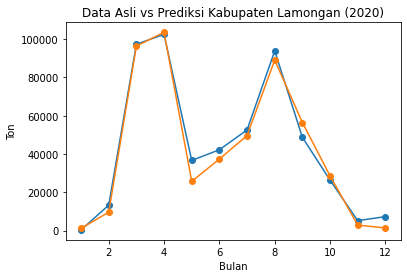

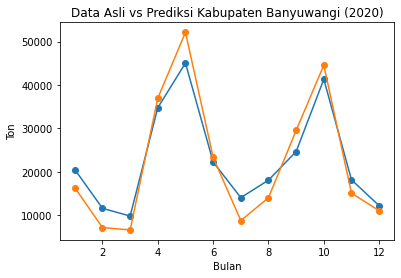

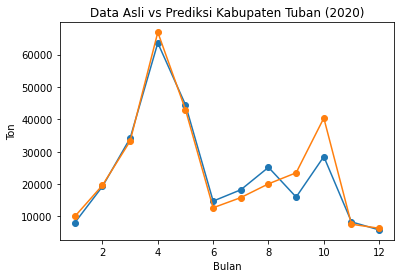

In [13]:
# Grafik garis dari total produksi beras tiap Kabupaten

# Kabupaten Lamongan
plt.plot(number_of_testing,output_prediksi_lamongan,marker='o')
plt.plot(number_of_testing,output_testing_lamongan,marker='o')
plt.title('Data Asli vs Prediksi Kabupaten Lamongan (2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# Kabupaten Banyuwangi
plt.plot(number_of_testing,output_prediksi_banyuwangi,marker='o')
plt.plot(number_of_testing,output_testing_banyuwangi,marker='o')
plt.title('Data Asli vs Prediksi Kabupaten Banyuwangi (2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# Kabupaten Tuban
plt.plot(number_of_testing,output_prediksi_tuban,marker='o')
plt.plot(number_of_testing,output_testing_tuban,marker='o')
plt.title('Data Asli vs Prediksi Kabupaten Tuban (2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

In [14]:
# Input data Konsumsi
input_konsumsi = []
number=1

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input_konsumsi.append(float(row[15]))
    number+=1

input_konsumsi_testing_lamongan = input_konsumsi[72:84]
input_konsumsi_testing_banyuwangi = input_konsumsi[84:96]
input_konsumsi_testing_tuban = input_konsumsi[96:108]

In [15]:
# Output Saran Kabupaten Lamongan
counter=0

for i in output_prediksi_lamongan:
  total_beras_distribusi_lamongan = i - input_konsumsi_testing_lamongan[counter]
  if (total_beras_distribusi_lamongan>0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Lamongan harus mendistribusikan beras sebesar " +str(total_beras_distribusi_lamongan)+" ke wilayah lain." )
  elif (total_beras_distribusi_lamongan<0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Lamongan harus didistribusikan beras sebesar " +str(abs(total_beras_distribusi_lamongan))+" dari wilayah lain." )
  else:
    print("Pada bulan "+str(counter+1)+", Kabupaten Lamongan tidak perlu mendistribusikan atau didistribusikan beras.")
  counter+=1

Pada bulan 1, Kabupaten Lamongan harus didistribusikan beras sebesar 11514.497573632812 dari wilayah lain.
Pada bulan 2, Kabupaten Lamongan harus mendistribusikan beras sebesar 2075.7071018749994 ke wilayah lain.
Pada bulan 3, Kabupaten Lamongan harus mendistribusikan beras sebesar 85425.63633750001 ke wilayah lain.
Pada bulan 4, Kabupaten Lamongan harus mendistribusikan beras sebesar 90905.4266075 ke wilayah lain.
Pada bulan 5, Kabupaten Lamongan harus mendistribusikan beras sebesar 24768.2379 ke wilayah lain.
Pada bulan 6, Kabupaten Lamongan harus mendistribusikan beras sebesar 30659.653169999998 ke wilayah lain.
Pada bulan 7, Kabupaten Lamongan harus mendistribusikan beras sebesar 40697.753525 ke wilayah lain.
Pada bulan 8, Kabupaten Lamongan harus mendistribusikan beras sebesar 81929.68321250001 ke wilayah lain.
Pada bulan 9, Kabupaten Lamongan harus mendistribusikan beras sebesar 37145.52817 ke wilayah lain.
Pada bulan 10, Kabupaten Lamongan harus mendistribusikan beras sebesar 14

In [16]:
# Output Saran Kabupaten Banyuwangi
counter=0

for i in output_prediksi_banyuwangi:
  total_beras_distribusi_banyuwangi = i - input_konsumsi_testing_banyuwangi[counter]
  if (total_beras_distribusi_banyuwangi>0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Banyuwangi harus mendistribusikan beras sebesar " +str(total_beras_distribusi_banyuwangi)+" ke wilayah lain." )
  elif (total_beras_distribusi_banyuwangi<0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Banyuwangi harus didistribusikan beras sebesar " +str(abs(total_beras_distribusi_banyuwangi))+" dari wilayah lain." )
  else:
    print("Pada bulan "+str(counter+1)+", Kabupaten Banyuwangi tidak perlu mendistribusikan atau didistribusikan beras.")
  counter+=1

Pada bulan 1, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 5396.93067125 ke wilayah lain.
Pada bulan 2, Kabupaten Banyuwangi harus didistribusikan beras sebesar 2692.6016071875 dari wilayah lain.
Pada bulan 3, Kabupaten Banyuwangi harus didistribusikan beras sebesar 5320.24901625 dari wilayah lain.
Pada bulan 4, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 20061.29685625 ke wilayah lain.
Pada bulan 5, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 29915.29004625 ke wilayah lain.
Pada bulan 6, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 7562.499981249999 ke wilayah lain.
Pada bulan 7, Kabupaten Banyuwangi harus didistribusikan beras sebesar 1078.6972584374998 dari wilayah lain.
Pada bulan 8, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 2947.545905625 ke wilayah lain.
Pada bulan 9, Kabupaten Banyuwangi harus mendistribusikan beras sebesar 9955.42966875 ke wilayah lain.
Pada bulan 10, Kabupaten Banyuwangi harus mendistribusik

In [17]:
# Output Saran Kabupaten Tuban
counter=0

for i in output_prediksi_tuban:
  total_beras_distribusi_tuban = i - input_konsumsi_testing_tuban[counter]
  if (total_beras_distribusi_tuban>0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Tuban harus mendistribusikan beras sebesar " +str(total_beras_distribusi_tuban)+" ke wilayah lain." )
  elif (total_beras_distribusi_tuban<0):
    print("Pada bulan "+str(counter+1)+", Kabupaten Tuban harus didistribusikan beras sebesar " +str(abs(total_beras_distribusi_tuban))+" dari wilayah lain." )
  else:
    print("Pada bulan "+str(counter+1)+", Kabupaten Tuban tidak perlu mendistribusikan atau didistribusikan beras.")
  counter+=1

Pada bulan 1, Kabupaten Tuban harus didistribusikan beras sebesar 2540.48466453125 dari wilayah lain.
Pada bulan 2, Kabupaten Tuban harus mendistribusikan beras sebesar 9251.386035625 ke wilayah lain.
Pada bulan 3, Kabupaten Tuban harus mendistribusikan beras sebesar 23558.6994175 ke wilayah lain.
Pada bulan 4, Kabupaten Tuban harus mendistribusikan beras sebesar 53269.88940125 ke wilayah lain.
Pada bulan 5, Kabupaten Tuban harus mendistribusikan beras sebesar 33889.785355 ke wilayah lain.
Pada bulan 6, Kabupaten Tuban harus mendistribusikan beras sebesar 4432.8161590625 ke wilayah lain.
Pada bulan 7, Kabupaten Tuban harus mendistribusikan beras sebesar 7630.322464375 ke wilayah lain.
Pada bulan 8, Kabupaten Tuban harus mendistribusikan beras sebesar 14568.26973 ke wilayah lain.
Pada bulan 9, Kabupaten Tuban harus mendistribusikan beras sebesar 5678.176510625 ke wilayah lain.
Pada bulan 10, Kabupaten Tuban harus mendistribusikan beras sebesar 17872.6369175 ke wilayah lain.
Pada bulan 1